In [15]:
import matplotlib.pyplot as plt

from monsoonbench.metrics import (
    ClimatologyOnsetMetrics,
    DeterministicOnsetMetrics,
    ProbabilisticOnsetMetrics,
)
from monsoonbench.visualization import (
    create_model_comparison_table,
    download_spatial_metrics_data,
    plot_model_comparison_dual_axis,
)
from monsoonbench.visualization.spatial import plot_spatial_metrics

### Climatology Baseline

In [2]:
config = {
    "years": [2019, 2020, 2021], # The years over which the model forecast should be evaluated
    "imd_folder": "../../../data/imd_rainfall_data/2p0", # Ground truth rainfall data
    "thres_file": "../../../data/imd_onset_threshold/mwset2x2.nc4", # Threshold for the onset of the monsoon
    "shpfile_path": "../../../data/ind_map_shpfile/india_shapefile.shp", # Shapefile of India
    # "model_forecast_dir": "/data/model_forecast_data/aifs/daily_0z/tp_2p0_lsm",
}

c_metrics = ClimatologyOnsetMetrics()

metrics_df_c, onset_da_c = c_metrics.compute_climatology_baseline_multiple_years(
    years=config["years"],
    # model_forecast_dir=config["model_forecast_dir"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)

Computing climatological onset reference...
Computing climatological onset from 124 years: 1901-2024
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1901.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1901-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1902.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1902-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1903.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1903-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1904.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1904-06-02) as start date for onset detection

In [3]:
onset_da_dict_clim = dict.fromkeys(config["years"], onset_da_c)

In [4]:
plot_climatology_metrics = c_metrics.create_spatial_far_mr_mae(metrics_df_c, onset_da_dict_clim)

Creating spatial FAR, Miss Rate, yearly MAE, and mean MAE maps...
Grid dimensions: 16 lats x 17 lons
Years: [2019, 2020, 2021]


Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/climatology_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 6.85 ± 0.88 days
CMZ False Alarm Rate: 20.0 %
CMZ Miss Rate: 50.2 %


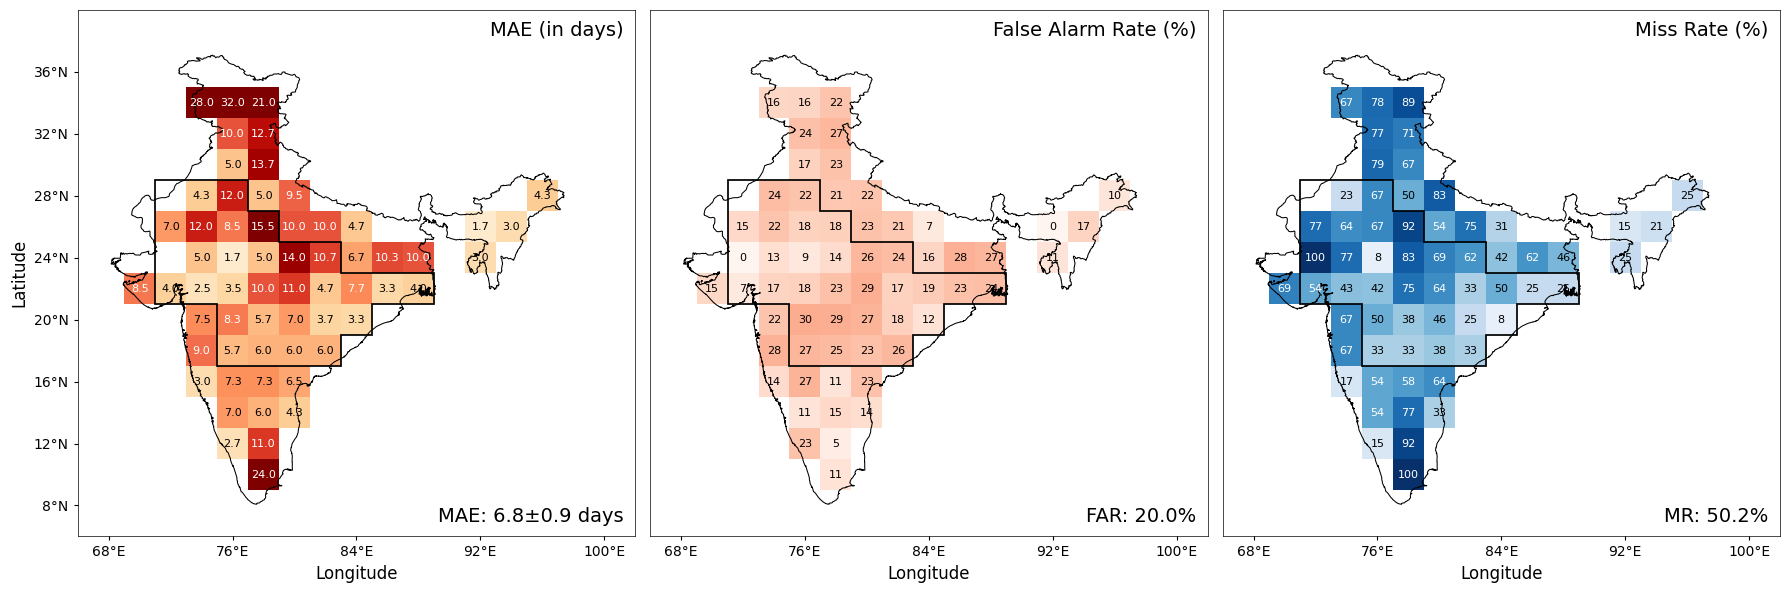

In [5]:
fig, axes = plot_spatial_metrics(
    plot_climatology_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/climatology_monsoon_onset_metrics.png",
)
plt.tight_layout()
plt.show()

### Deterministic Pipeline

In [6]:
config["model_forecast_dir"] = "../../../data/model_forecast_data/aifs/daily_0z/tp_2p0_lsm/" # Deterministic Model Forecast
metrics = DeterministicOnsetMetrics()

In [7]:
deterministic_df, onset_da_dict = metrics.compute_metrics_multiple_years(
    years=config["years"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    model_forecast_dir=config["model_forecast_dir"],
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_2019.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 16 lats x 17 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 7072
Skipped (no observed onset): 5460
Skipped (initialized after observed onset): 688
Valid initializations processed: 924
Onsets found: 307
Onset rate: 0.332
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 62 u

In [8]:
plot_deterministic_metrics = metrics.create_spatial_far_mr_mae(deterministic_df, onset_da_dict)

Creating spatial FAR, Miss Rate, yearly MAE, and mean MAE maps...
Grid dimensions: 16 lats x 17 lons
Years: [2019, 2020, 2021]


Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/deterministic_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 5.00 ± 0.57 days
CMZ False Alarm Rate: 22.7 %
CMZ Miss Rate: 22.2 %


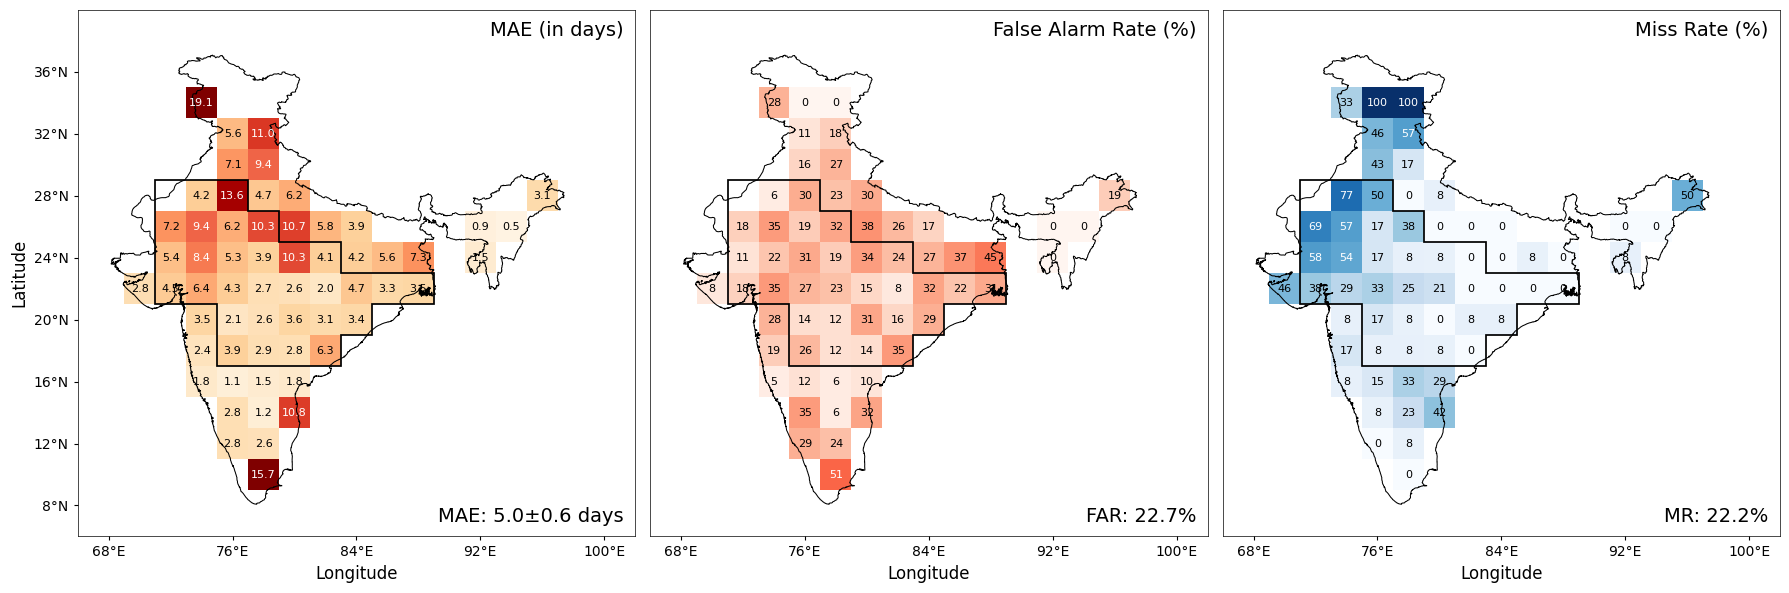

In [9]:
fig, axes = plot_spatial_metrics(
    plot_deterministic_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/deterministic_monsoon_onset_metrics.png",
)

plt.tight_layout()
plt.show()

### Probabilistic Model 

In [10]:
config["model_forecast_dir"] = "../../../data/model_forecast_data/IFS-S2S/tp_2p0" # Probabilistic Model Forecast
metrics = ProbabilisticOnsetMetrics()

probabilistic_df, onset_da_dict = metrics.compute_metrics_multiple_years(
    years=config["years"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    model_forecast_dir=config["model_forecast_dir"],
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)
plot_probabilistic_metrics= metrics.create_spatial_far_mr_mae(probabilistic_df, onset_da_dict)


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_2019.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 16 lats x 17 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Requiring ≥50% of 11 members to have onset for ensemble onset
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 7072
Skipped (no observed onset): 5460
Skipped (initialized after observed onset): 688
Valid initializations processed: 924
Ensemble onsets found (≥50% members): 273
Ensemble onset rate: 0.295
Note: Only onsets on or after 6/2 were counted due to M

Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/probabilistic_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 4.47 ± 0.15 days
CMZ False Alarm Rate: 17.7 %
CMZ Miss Rate: 24.2 %


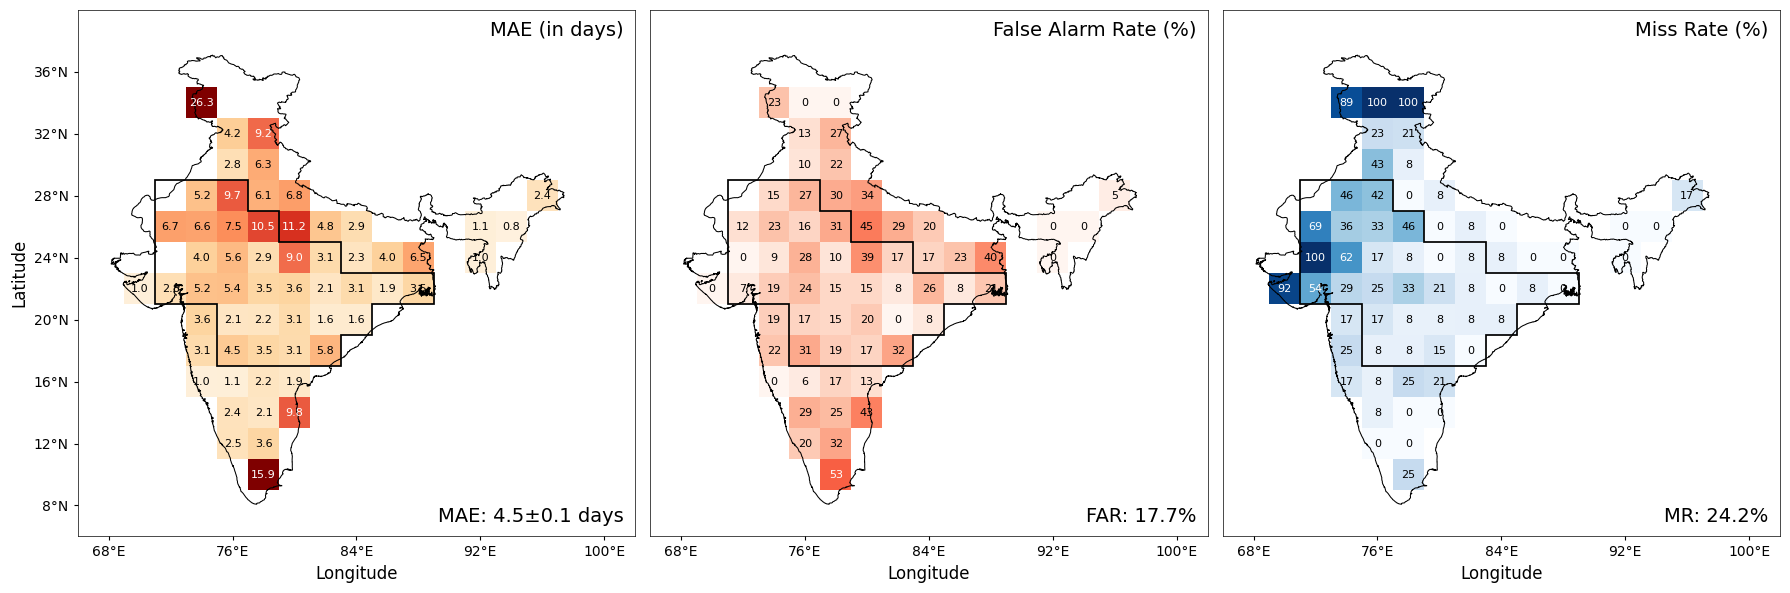

In [11]:
fig, axes = plot_spatial_metrics(
    plot_probabilistic_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/probabilistic_monsoon_onset_metrics.png",
)
fig.show()

### Comparison Table and Plot

In [12]:
model_spatial_metrics = {
    "Climatology": plot_climatology_metrics,
    "IFS-S2S": plot_probabilistic_metrics, 
    "AIFS": plot_deterministic_metrics, 
}

comparison_df = create_model_comparison_table(model_spatial_metrics)
comparison_df

,cmz_mae_mean_days,cmz_mae_se_days,cmz_far_pct,cmz_mr_pct,overall_mae_mean_days,overall_far_pct,overall_mr_pct
model,,,,,,,
Climatology,6.847104,0.884399,19.978228,50.222833,7.876662,18.767144,53.713222
IFS-S2S,4.469061,0.148196,17.668443,24.203297,4.628318,18.466942,22.416204
AIFS,4.996454,0.567900,22.710683,22.182540,5.124538,21.091136,22.143448


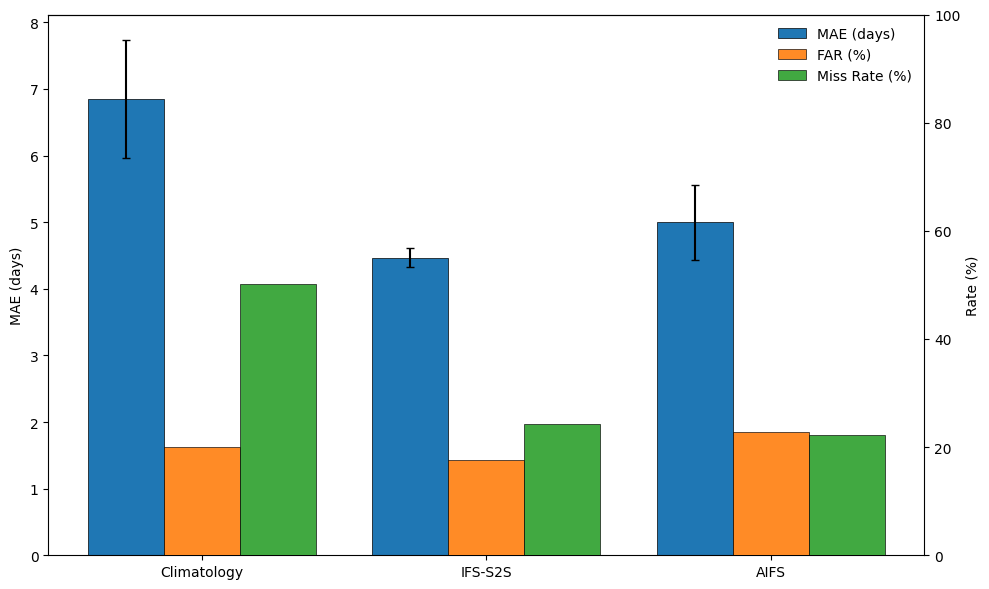

In [13]:
fig, (ax_left, ax_right) = plot_model_comparison_dual_axis(
    comparison_df,
)
fig.show()

## Data downloading!

In [14]:
c, d, p = plot_climatology_metrics, plot_deterministic_metrics, plot_probabilistic_metrics

In [17]:
download_c = download_spatial_metrics_data(
    c,
    output_dir="outputs",
    filename="climatology_spatial_metrics",
    formats=("netcdf", "csv"),
    metadata={"notebook_section": "climatology"},
)
download_d = download_spatial_metrics_data(
    d,
    output_dir="outputs",
    filename="deterministic_spatial_metrics",
    formats=("netcdf", "csv"),
    metadata={"notebook_section": "deterministic"},
)
download_p = download_spatial_metrics_data(
    p,
    output_dir="outputs",
    filename="probabilistic_spatial_metrics",
    formats=("netcdf", "csv"),
    metadata={"notebook_section": "probabilistic"},
)

In [19]:
print(download_c,"\n", download_d, "\n", download_p)

[PosixPath('outputs/climatology_spatial_metrics.nc'), PosixPath('outputs/climatology_spatial_metrics.csv')] 
 [PosixPath('outputs/deterministic_spatial_metrics.nc'), PosixPath('outputs/deterministic_spatial_metrics.csv')] 
 [PosixPath('outputs/probabilistic_spatial_metrics.nc'), PosixPath('outputs/probabilistic_spatial_metrics.csv')]


In [20]:
import pandas as pd

df_c = pd.read_csv("outputs/climatology_spatial_metrics.csv")
df_d = pd.read_csv("outputs/deterministic_spatial_metrics.csv")
df_p = pd.read_csv("outputs/probabilistic_spatial_metrics.csv")

In [22]:
df_c.head()

,lat,lon,false_alarm_rate,miss_rate,mean_mae,mae_2019,mae_2020,mae_2021
0,10,78,0.111111,1.000000,24.000000,24.0,NaN,NaN
1,12,76,0.227273,0.153846,2.666667,1.0,3.0,4.0
2,12,78,0.050000,0.923077,11.000000,NaN,11.0,NaN
3,14,76,0.105263,0.538462,7.000000,10.0,1.0,10.0
4,14,78,0.150000,0.769231,6.000000,NaN,6.0,NaN


In [23]:
df_d.head()

,lat,lon,false_alarm_rate,miss_rate,mean_mae,mae_2019,mae_2020,mae_2021
0,10,78,0.513514,0.000000,15.722222,45.166667,2.000000,0.000000
1,12,76,0.285714,0.000000,2.753968,2.333333,1.500000,4.428571
2,12,78,0.238095,0.076923,2.607143,0.250000,7.571429,0.000000
3,14,76,0.347826,0.076923,2.793651,3.666667,4.714286,0.000000
4,14,78,0.058824,0.230769,1.222222,0.666667,3.000000,0.000000


In [25]:
df_p.head()

,lat,lon,false_alarm_rate,miss_rate,mean_mae,mae_2019,mae_2020,mae_2021
0,10,78,0.527778,0.250000,15.859649,45.578947,1.500000,0.500000
1,12,76,0.200000,0.000000,2.492857,1.800000,1.250000,4.428571
2,12,78,0.318182,0.000000,3.574074,1.000000,9.222222,0.500000
3,14,76,0.285714,0.076923,2.448413,1.666667,5.428571,0.250000
4,14,78,0.250000,0.000000,2.083333,0.750000,5.000000,0.500000
